In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

In [ ]:
# a)
drive.mount('/content/drive')
dt = pd.read_csv("/content/drive/MyDrive/data.csv", names=["Tamanho", "Quartos", "Preço"])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# b)
print(dt.describe())

media_preco = dt['Preço'].mean()

indice_menor_casa = dt['Tamanho'].idxmin()
preco_menor_casa = dt.loc[indice_menor_casa, 'Preço']

indice_casa_mais_cara = dt['Preço'].idxmax()
quartos_casa_mais_cara = dt.loc[indice_casa_mais_cara, 'Quartos']

print(f"Média de preço: ", media_preco)
print(f"Preço da menor casa: ", preco_menor_casa)
print(f"Quartos da casa mais cara: ", quartos_casa_mais_cara)

           Tamanho    Quartos          Preço
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.765957
std     794.702354   0.760982  125039.911223
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
Média de preço:  340412.7659574468
Preço da menor casa:  179900.0
Quartos da casa mais cara:  5


In [ ]:
# c)
X = dt[['Tamanho', 'Quartos']]
y = dt['Preço']


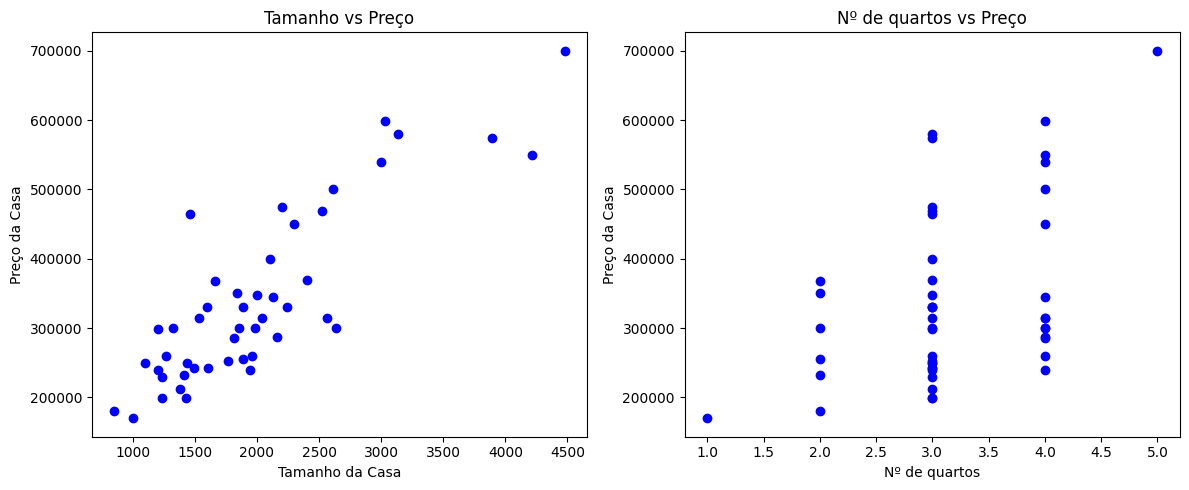

In [ ]:
# d)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(dt['Tamanho'], dt['Preço'], color='blue')
plt.xlabel('Tamanho da Casa')
plt.ylabel('Preço da Casa')
plt.title('Tamanho vs Preço')

plt.subplot(1, 2, 2)
plt.scatter(dt['Quartos'], dt['Preço'], color='blue')
plt.xlabel('Nº de quartos')
plt.ylabel('Preço da Casa')
plt.title('Nº de quartos vs Preço')

plt.tight_layout()
plt.show()

# coeficiente de correlação

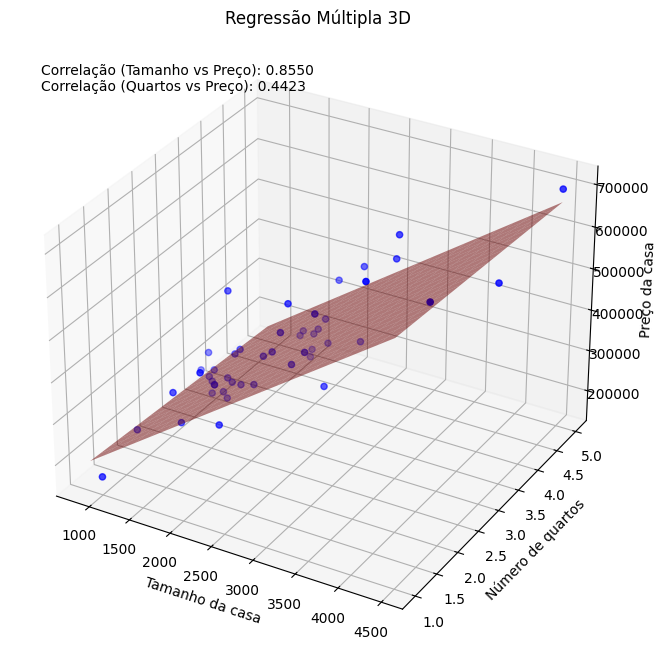

In [ ]:
# e) f) g)

# e) calculando a regressão multipla
X = np.column_stack((np.ones(dt.shape[0]), dt[['Tamanho', 'Quartos']]))
y = dt['Preço'].values
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# f) linha de regressão
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dt['Tamanho'], dt['Quartos'], dt['Preço'], c='blue', marker='o')

size, rooms = np.meshgrid(
    np.linspace(dt['Tamanho'].min(), dt['Tamanho'].max(), 20),
    np.linspace(dt['Quartos'].min(), dt['Quartos'].max(), 20)
)
price = beta[0] + beta[1] * size + beta[2] * rooms
ax.plot_surface(size, rooms, price, alpha=0.5, color='red')

ax.set_xlabel('Tamanho da casa')
ax.set_ylabel('Número de quartos')
ax.set_zlabel('Preço da casa')
plt.title('Regressão Múltipla 3D')

# g) coeficientes de correlação
corr_size_price = np.corrcoef(dt['Tamanho'], dt['Preço'])[0, 1]
corr_bedrooms_price = np.corrcoef(dt['Quartos'], dt['Preço'])[0, 1]

texto_correlacoes = (
    f"Correlação (Tamanho vs Preço): {corr_size_price:.4f}\n"
    f"Correlação (Quartos vs Preço): {corr_bedrooms_price:.4f}"
)
ax.text2D(0.05, 0.95, texto_correlacoes, transform=ax.transAxes, fontsize=10, verticalalignment='top')

plt.show()

In [ ]:
# h)

# 1650 e 3 quartos
entrada1 = np.array([1, 1650, 3])
previsao1 = entrada1 @ beta

# 1650 e 5 quartos
entrada2 = np.array([1, 1650, 5])
previsao2 = entrada2 @ beta

#  1650 e 1 quarto
entrada3 = np.array([1, 1650, 1])
previsao3 = entrada3 @ beta

print(f"Preço previsto para casa de 1650 e 3 quartos: {int(previsao1)}")
print(f"Preço previsto para casa de 1650 e 5 quartos: {int(previsao2)}")
print(f"Preço previsto para casa de 1650 e 1 quarto: {int(previsao3)}")

# quando você aumenta o número de quartos, o preço sobe.
# quando diminui o número de quartos, o preço cai.
# o número de quartos tem um coeficiente positivo no modelo de regressão
# [ quanto mais quartos, maior o preço previsto ]

Preço previsto para casa de 1650 e 3 quartos: 293081
Preço previsto para casa de 1650 e 5 quartos: 275605
Preço previsto para casa de 1650 e 1 quarto: 310557


In [ ]:
# i)

modelo_sklearn = LinearRegression().fit(dt[['Tamanho', 'Quartos']], dt['Preço'])
intercepto, coeficientes = modelo_sklearn.intercept_, modelo_sklearn.coef_

print(f"Intercepto (β0): {intercepto:.2f}")
print(f"Coeficientes (β1 e β2): {coeficientes}")
print("\nComparaçã:")
print(f"Beta manual: {beta}")

Intercepto (β0): 89597.77
Coeficientes (β1 e β2): [  139.21063465 -8737.91542019]

Comparaçã:
Beta manual: [89597.765961     139.21063465 -8737.91542019]
